In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

Zadanie 1. 25pkt Zadaniem jest określenie typów wina na podstawie poniższego zbioru danych: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html

Przeprowadź krótką wstępną analizę danych Stwórz funkcję budującą model (DNN) Przeprowadź trening i walidację wyników Na podstawie historii treningu przedstaw zmianę funkcji loss Sprawdź jak zmiana parametrów i architektury Twojej sieci wpływa na wyniki i przedstaw swoje obserwacje

In [2]:
from sklearn.datasets import load_wine
data = load_wine()
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [3]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [3]:
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [5]:
df['target'] = data.target
df.sample(20)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
110,11.46,3.74,1.82,19.5,107.0,3.18,2.58,0.24,3.58,2.900000,0.75,2.81,562.0,1
25,13.05,2.05,3.22,25.0,124.0,2.63,2.68,0.47,1.92,3.580000,1.13,3.20,830.0,0
65,12.37,1.21,2.56,18.1,98.0,2.42,2.65,0.37,2.08,4.600000,1.19,2.30,678.0,1
105,12.42,2.55,2.27,22.0,90.0,1.68,1.84,0.66,1.42,2.700000,0.86,3.30,315.0,1
154,12.58,1.29,2.10,20.0,103.0,1.48,0.58,0.53,1.40,7.600000,0.58,1.55,640.0,2
106,12.25,1.73,2.12,19.0,80.0,1.65,2.03,0.37,1.63,3.400000,1.00,3.17,510.0,1
165,13.73,4.36,2.26,22.5,88.0,1.28,0.47,0.52,1.15,6.620000,0.78,1.75,520.0,2
169,13.40,4.60,2.86,25.0,112.0,1.98,0.96,0.27,1.11,8.500000,0.67,1.92,630.0,2
55,13.56,1.73,2.46,20.5,116.0,2.96,2.78,0.20,2.45,6.250000,0.98,3.03,1120.0,0
77,11.84,2.89,2.23,18.0,112.0,1.72,1.32,0.43,0.95,2.650000,0.96,2.52,500.0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [7]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [8]:
df['target'].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [9]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

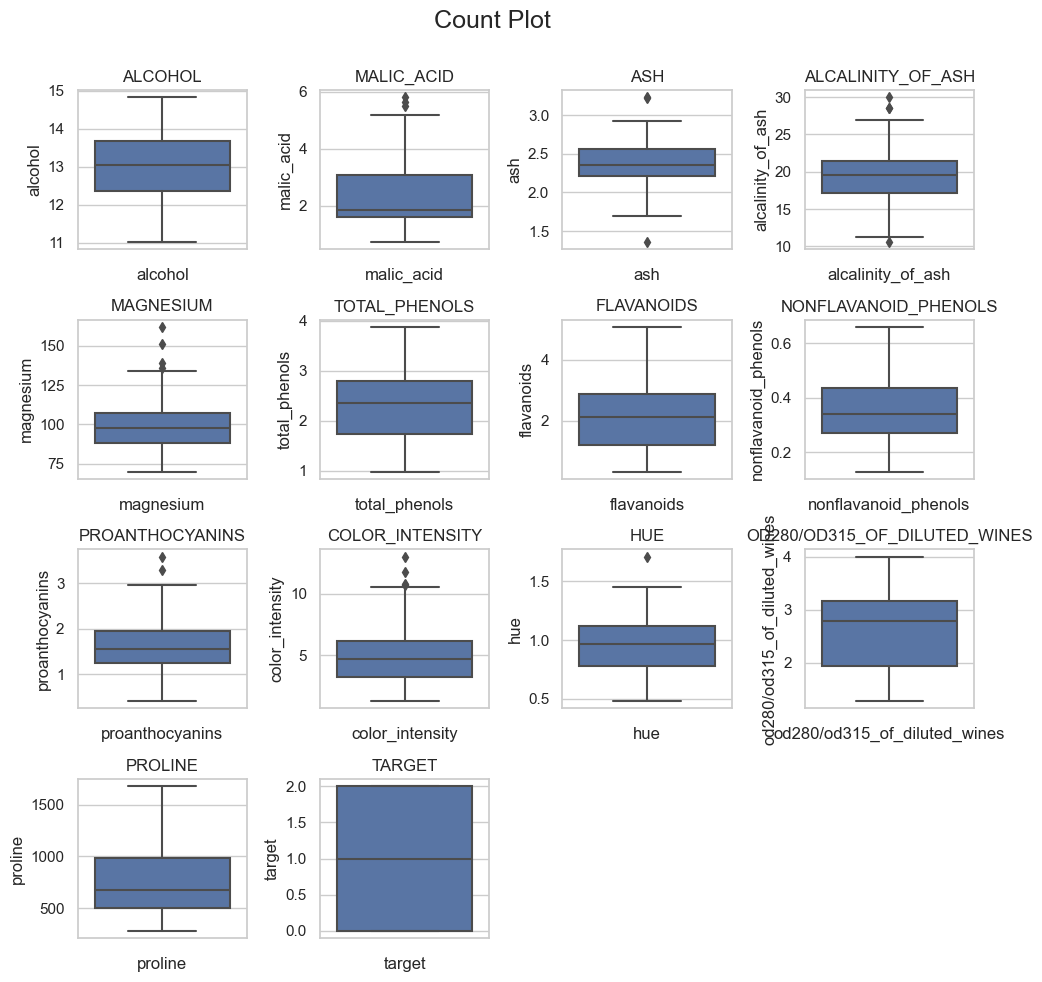

In [46]:
plt.figure(figsize=(10, 10))
sns.set(style="whitegrid")
for i, col in enumerate(df.columns):
    ax = plt.subplot(4, 4, i+1)
    sns.boxplot(data=df, y=col, ax=ax)
    plt.suptitle('Count Plot', size=18)
    plt.xlabel(f'{col}')
    plt.xticks(rotation=90)
    plt.title(f'{col.upper()}')
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
plt.show()

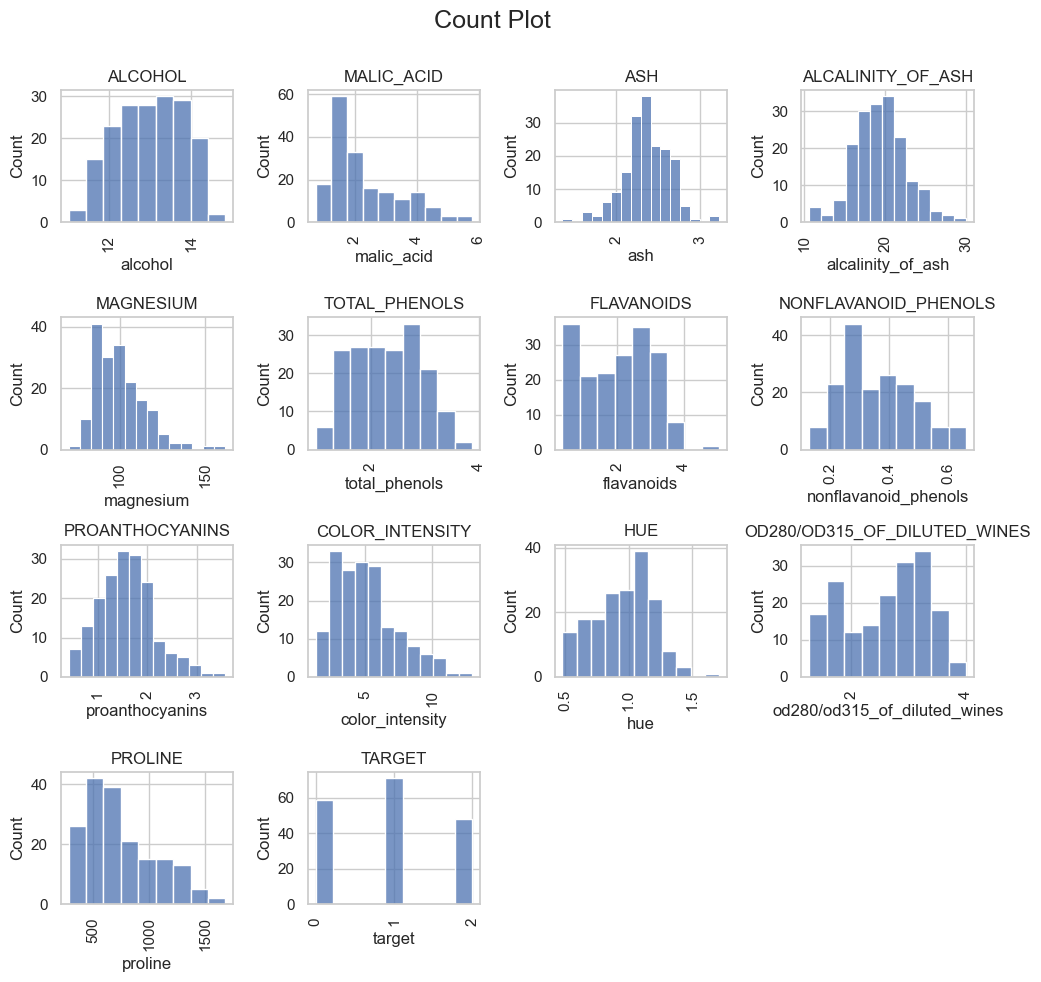

In [47]:
plt.figure(figsize=(10, 10))
sns.set(style="whitegrid")
for i, col in enumerate(df.columns):
    ax = plt.subplot(4, 4, i+1)
    sns.histplot(data=df, x=col, ax=ax)
    plt.suptitle('Count Plot', size=18)
    plt.xlabel(f'{col}')
    plt.xticks(rotation=90)
    plt.title(f'{col.upper()}')
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
plt.show()

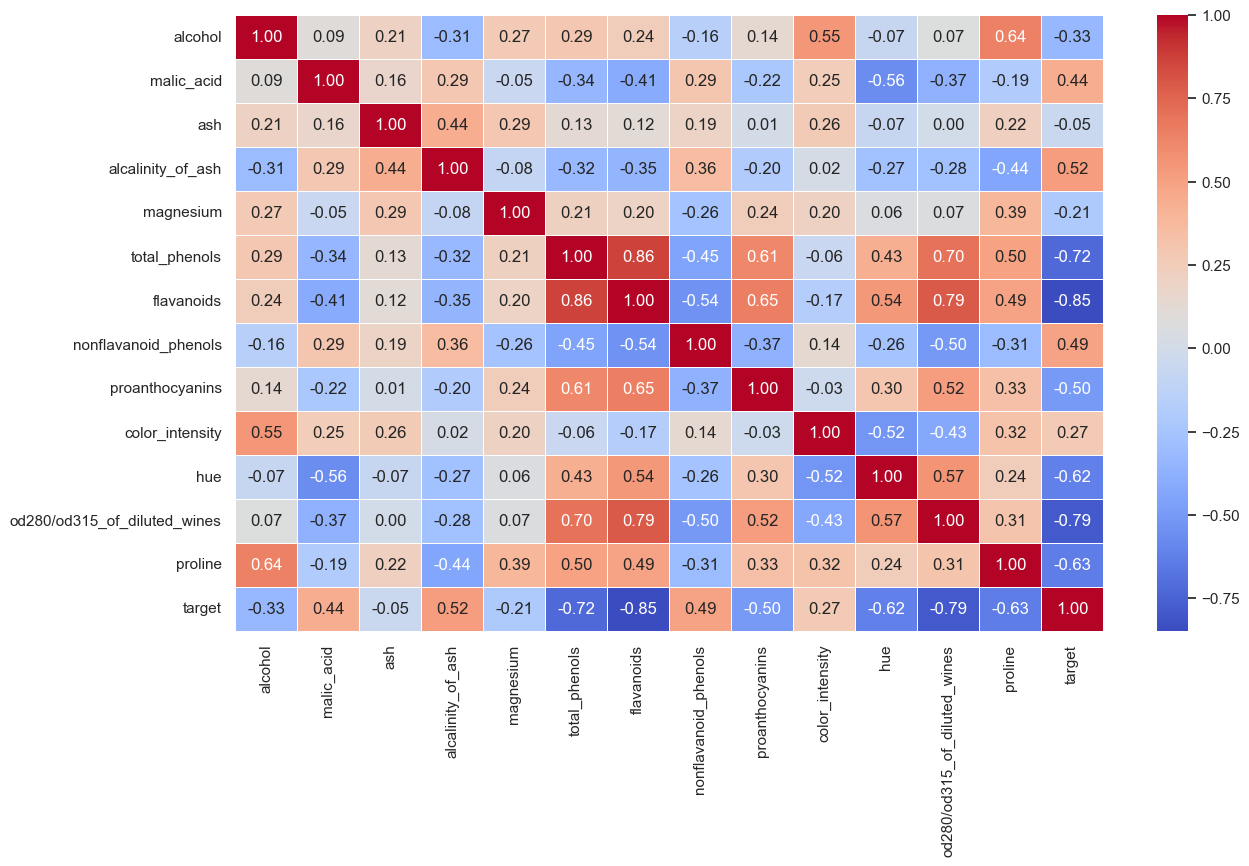

In [48]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True,linewidths=0.7,fmt=".2f",cmap="coolwarm")
plt.show()

In [44]:
data.feature_names


['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [45]:
# Wybór cech na podstawie korelacji
df_features = df.drop(["total_phenols", 'target'], axis=1)
df_features

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [46]:
# Skalowanie cech 
standardscaler = StandardScaler()
standardscaler.fit_transform(df_features)

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [47]:
# Ramka cech po skalowaniu
wine_std = pd.DataFrame(standardscaler.fit_transform(df_features), columns=df_features.columns)
wine_std

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [48]:
# Zmienne cech i etykiety
X = wine_std
y = df['target']

In [49]:
y.shape

(178,)

In [50]:
# Podział danych na treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
X_train.shape

(142, 12)

In [52]:
X_test.shape

(36, 12)

Zbiór nie jest duży, zatem na początku zastosowano modelu z jedną warstwą ukrytą.
Zastosowano funkcję straty SparseCategoricalCrossentropy, aby nie wykonywać one-hot encoding na klasach, ponieważ etykietami są indeksy dla każdego rodzaju wina.

In [76]:
# Funkcja do tworzenia modelu DNN
def create_model(hNum, classNum, act):
    model = tf.keras.Sequential()
    model.add(layers.InputLayer(input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(hNum, activation=act, name="warstwa_ukryta"))
    model.add(layers.Dense(classNum, activation='softmax', name="wyjscie"))  

    print(model.summary())

    opt = tf.keras.optimizers.SGD(learning_rate=0.01)

    model.compile(optimizer=opt,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

    return model

In [77]:
model = create_model(10, 3, "relu")

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 warstwa_ukryta (Dense)      (None, 10)                130       
                                                                 
 wyjscie (Dense)             (None, 3)                 33        
                                                                 
Total params: 163 (652.00 Byte)
Trainable params: 163 (652.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [78]:
# Callback EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [79]:
# Trening modelu z EarlyStopping
result = model.fit(X_train, y_train, epochs=400, batch_size=20, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/400
8/8 [==============================] - 1s 53ms/step - loss: 1.0552 - accuracy: 0.4718 - val_loss: 1.0377 - val_accuracy: 0.4722
Epoch 2/400
8/8 [==============================] - 0s 7ms/step - loss: 0.9924 - accuracy: 0.5282 - val_loss: 0.9812 - val_accuracy: 0.5000
Epoch 3/400
8/8 [==============================] - 0s 7ms/step - loss: 0.9391 - accuracy: 0.5986 - val_loss: 0.9307 - val_accuracy: 0.5556
Epoch 4/400
8/8 [==============================] - 0s 7ms/step - loss: 0.8918 - accuracy: 0.6338 - val_loss: 0.8831 - val_accuracy: 0.6111
Epoch 5/400
8/8 [==============================] - 0s 7ms/step - loss: 0.8473 - accuracy: 0.6690 - val_loss: 0.8394 - val_accuracy: 0.6944
Epoch 6/400
8/8 [==============================] - 0s 8ms/step - loss: 0.8060 - accuracy: 0.6972 - val_loss: 0.8036 - val_accuracy: 0.6944
Epoch 7/400
8/8 [==============================] - 0s 7ms/step - loss: 0.7719 - accuracy: 0.7254 - val_loss: 0.7667 - val_accuracy: 0.6944
Epoch 8/400
8/8 [=========

In [80]:
# Epoka na której zostanie zatrzymany trening
stopped_epoch = len(result.history['val_loss'])
print(f"Trening zatrzymany na epoce {stopped_epoch}")

Trening zatrzymany na epoce 375


In [81]:
result.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

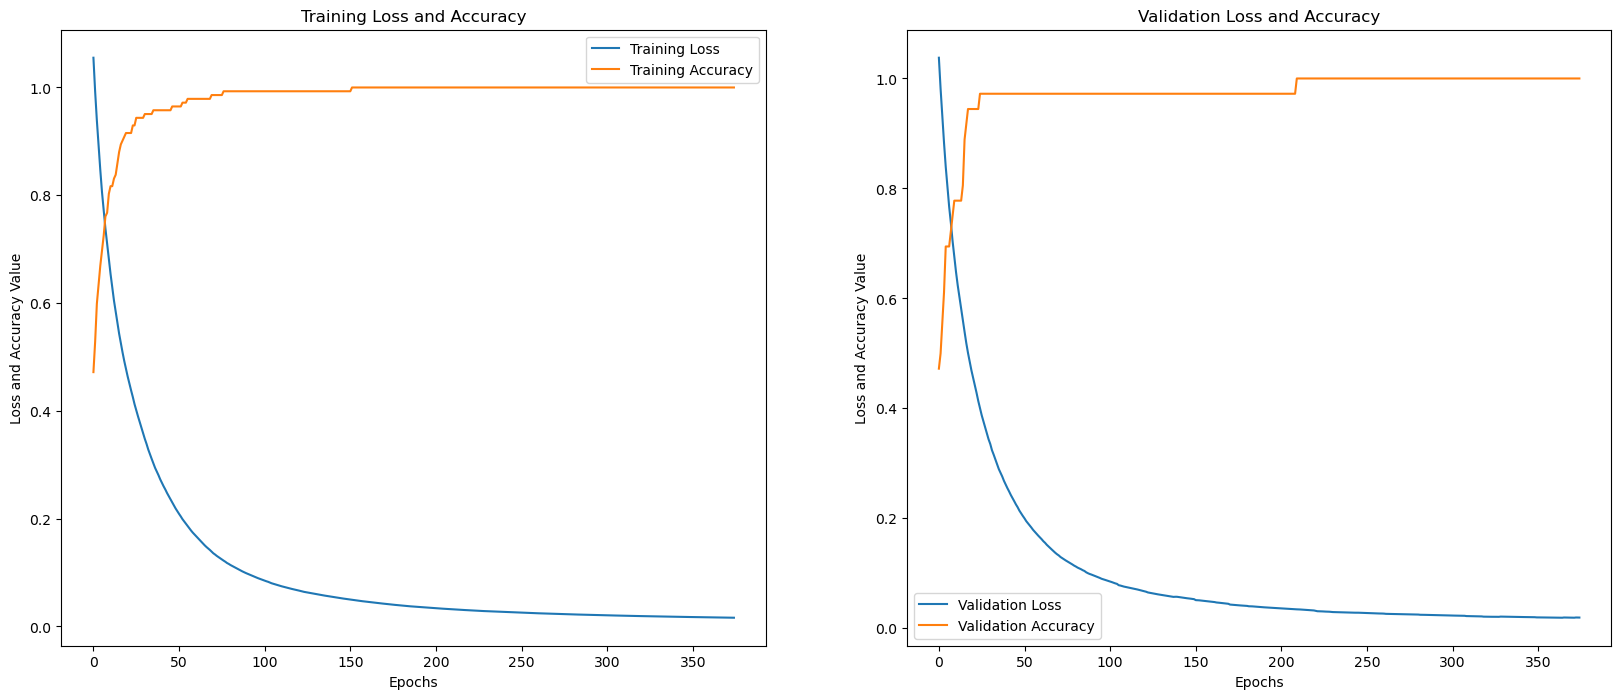

In [82]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Wykres dla danych trenowania
axes[0].plot(result.history['loss'], label='Training Loss')
axes[0].plot(result.history['accuracy'], label='Training Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss and Accuracy Value')
axes[0].set_title('Training Loss and Accuracy')
axes[0].legend()

# Wykres dla danych walidacji
axes[1].plot(result.history['val_loss'], label='Validation Loss')
axes[1].plot(result.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss and Accuracy Value')
axes[1].set_title('Validation Loss and Accuracy')
axes[1].legend()

plt.show()

In [83]:
# Ocenianie modelu na danych testowych
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

2/2 - 0s - loss: 0.0192 - accuracy: 1.0000 - 32ms/epoch - 16ms/step


In [84]:
# prognozowanie klasy na próbkach testowych
y_pred_test = model.predict(X_test)

2/2 [==============================] - 0s 2ms/step


In [85]:
# Znazienie przewidywnej klasy za pomocą argmax, wyniki są prawdopodobiństwami przynależności do klas
y_pred_labels = np.argmax(y_pred_test, axis=1)

In [86]:
confusion = confusion_matrix(y_test, y_pred_labels)

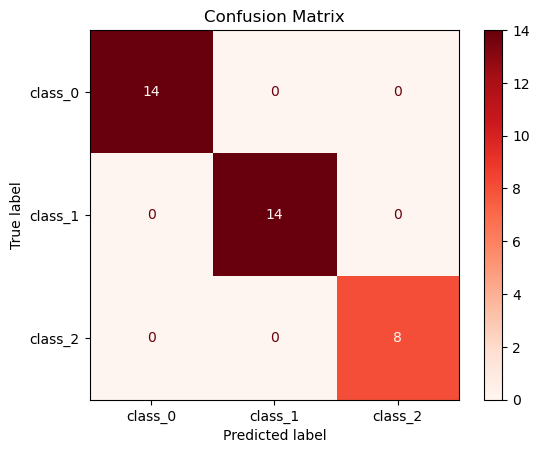

In [87]:
disp = ConfusionMatrixDisplay(confusion, display_labels=data.target_names)
disp.plot(cmap='Reds', values_format='d')

plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

In [88]:
report = classification_report(y_test, y_pred_labels , target_names=data.target_names)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



Obserwacje:
Przy niedużym zbiorze, z jedną wartwą ukrtytą i 10 neuronami, model zachowuje się idealnie, ale świadczy to o nadmiernym dostosowaniu próbek, co prowadzi do przeuczenia, zatem w kolejnym kroku zdecydwano zastosować techniką regularyzacji Dropout, która polega na losowym dezaktywowaniu pewnych neuronów.

In [171]:
# Funkcja do tworzenia modelu DNN z warstwą Dropout 
def create_model_drop(hNum, classNum, act, drop):
    model = tf.keras.Sequential()
    model.add(layers.InputLayer(input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(hNum, activation=act, name="warstwa_ukryta"))
    model.add(layers.Dropout(drop))
    model.add(layers.Dense(classNum, activation='softmax', name="wyjscie"))  
    print(model.summary())

    opt = tf.keras.optimizers.SGD(learning_rate=0.01)

    model.compile(optimizer=opt,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

    return model

In [172]:
model_drop = create_model_drop(10, 3, "relu", 0.3)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 warstwa_ukryta (Dense)      (None, 10)                130       
                                                                 
 dropout_13 (Dropout)        (None, 10)                0         
                                                                 
 wyjscie (Dense)             (None, 3)                 33        
                                                                 
Total params: 163 (652.00 Byte)
Trainable params: 163 (652.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


None


In [173]:
# Callback EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [174]:
# Trening modelu z EarlyStopping
result_2 = model_drop.fit(X_train, y_train, epochs=400, batch_size=10, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/400
15/15 [==============================] - 1s 13ms/step - loss: 1.1763 - accuracy: 0.3239 - val_loss: 0.9729 - val_accuracy: 0.4444
Epoch 2/400
15/15 [==============================] - 0s 4ms/step - loss: 1.0800 - accuracy: 0.3451 - val_loss: 0.8580 - val_accuracy: 0.5833
Epoch 3/400
15/15 [==============================] - 0s 4ms/step - loss: 0.9196 - accuracy: 0.5423 - val_loss: 0.7704 - val_accuracy: 0.6389
Epoch 4/400
15/15 [==============================] - 0s 5ms/step - loss: 0.8958 - accuracy: 0.5704 - val_loss: 0.7052 - val_accuracy: 0.6944
Epoch 5/400
15/15 [==============================] - 0s 5ms/step - loss: 0.8483 - accuracy: 0.6408 - val_loss: 0.6454 - val_accuracy: 0.8056
Epoch 6/400
15/15 [==============================] - 0s 5ms/step - loss: 0.7695 - accuracy: 0.7183 - val_loss: 0.5975 - val_accuracy: 0.8611
Epoch 7/400
15/15 [==============================] - 0s 4ms/step - loss: 0.7071 - accuracy: 0.7676 - val_loss: 0.5541 - val_accuracy: 0.8889
Epoch 8/400


In [175]:
# Epoka na której zostanie zatrzymany trening
stopped_epoch = len(result_2.history['val_loss'])
print(f"Trening zatrzymany na epoce {stopped_epoch}")

Trening zatrzymany na epoce 385


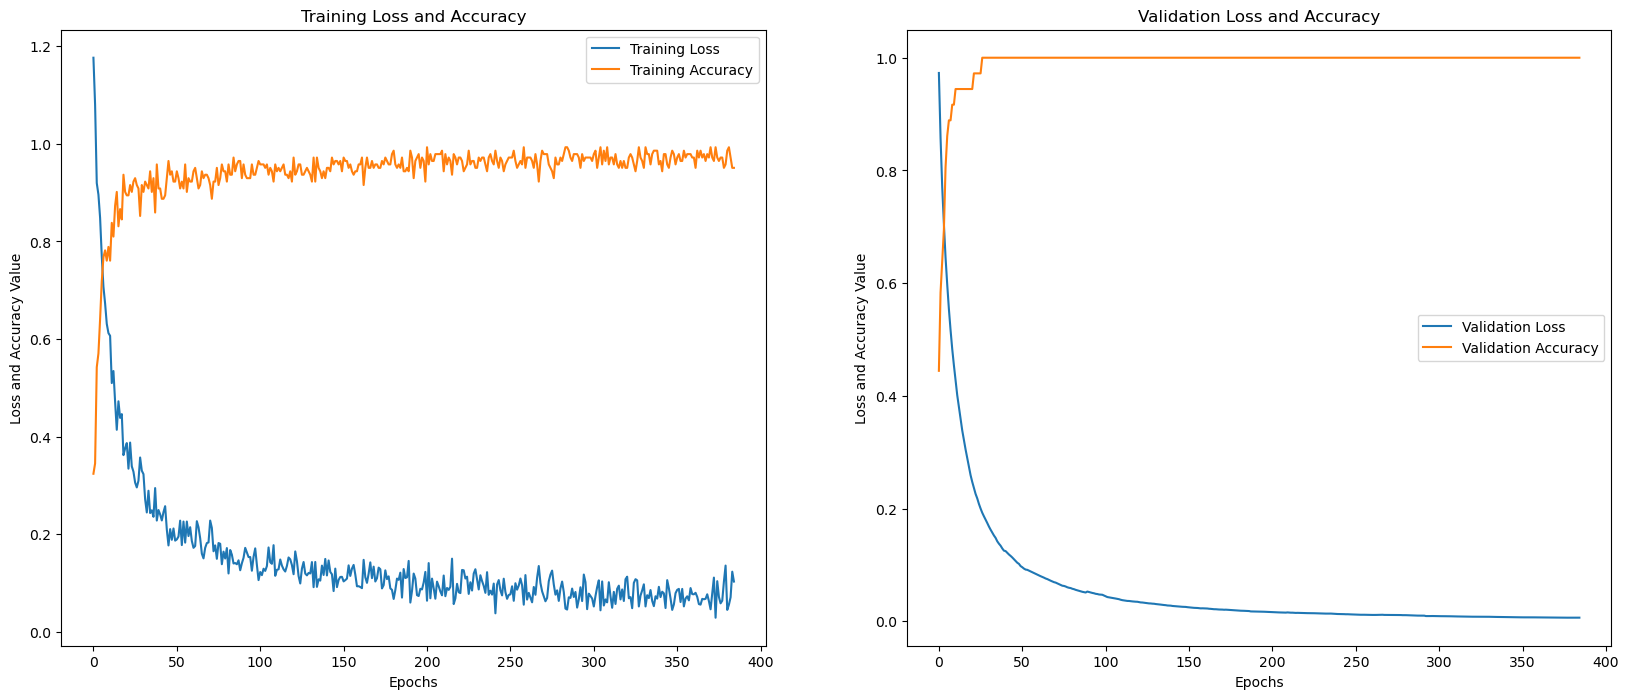

In [176]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Wykres dla danych trenowania
axes[0].plot(result_2.history['loss'], label='Training Loss')
axes[0].plot(result_2.history['accuracy'], label='Training Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss and Accuracy Value')
axes[0].set_title('Training Loss and Accuracy')
axes[0].legend()

# Wykres dla danych walidacji
axes[1].plot(result_2.history['val_loss'], label='Validation Loss')
axes[1].plot(result_2.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss and Accuracy Value')
axes[1].set_title('Validation Loss and Accuracy')
axes[1].legend()

plt.show()

In [177]:
# Ocenianie modelu na danych testowych
test_loss, test_accuracy = model_drop.evaluate(X_test, y_test, verbose=2)

2/2 - 0s - loss: 0.0063 - accuracy: 1.0000 - 40ms/epoch - 20ms/step


In [178]:
# prognozowanie klasy na próbkach testowych
y_pred_test_drop = model_drop.predict(X_test)

2/2 [==============================] - 0s 2ms/step


In [179]:
# Znazienie przewidywnej klasy za pomocą argmax, wyniki są prawdopodobiństwami przynależności do klas
y_pred_labels_drop = np.argmax(y_pred_test, axis=1)

In [180]:
confusion_drop = confusion_matrix(y_test, y_pred_labels)

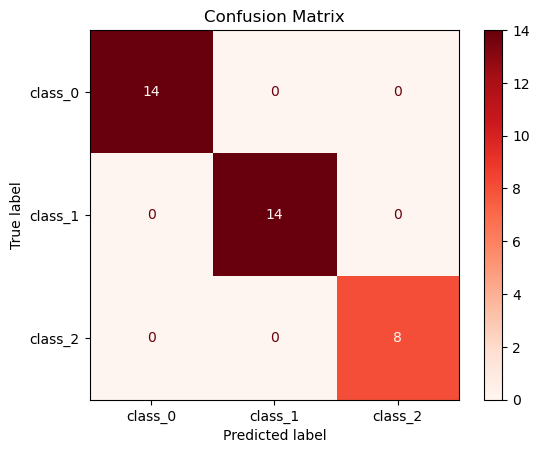

In [181]:
disp = ConfusionMatrixDisplay(confusion_drop, display_labels=data.target_names)
disp.plot(cmap='Reds', values_format='d')

plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

In [182]:
report_drop = classification_report(y_test, y_pred_labels , target_names=data.target_names)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



Obserwacje: W tym przypadku technika regularyzacji Dropout nie pomogła, zatem zostanie zastowowana dodatkowa warstwa ukryta aby model lepiej ugólniał dane.

In [376]:
def create_model_2(inNum, hNum, hAct, outNum, learning_rate):
    model = tf.keras.Sequential()
    model.add(layers.InputLayer(input_shape=(inNum)))
    for idx, oneHidNum in enumerate(hNum):
        model.add(layers.Dense(oneHidNum, activation=hAct))
   
    model.add(layers.Dense(outNum))
    
    print(model.summary())
    
    opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    
    model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
    
    return model

In [384]:
model_2 = create_model_2(X_train.shape[1], [20, 20], 'relu', 3, 0.001)

Model: "sequential_74"


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_221 (Dense)           (None, 20)                260       
                                                                 
 dense_222 (Dense)           (None, 20)                420       
                                                                 
 dense_223 (Dense)           (None, 3)                 63        
                                                                 
Total params: 743 (2.90 KB)
Trainable params: 743 (2.90 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [385]:
# Callback EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [386]:
# Trening modelu z EarlyStopping
history = model_2.fit(X_train, y_train, epochs=400, batch_size=10, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/400
15/15 [==============================] - 1s 15ms/step - loss: 2.5416 - accuracy: 0.4296 - val_loss: 1.9331 - val_accuracy: 0.3889
Epoch 2/400
15/15 [==============================] - 0s 5ms/step - loss: 1.5790 - accuracy: 0.4577 - val_loss: 1.3485 - val_accuracy: 0.4167
Epoch 3/400
15/15 [==============================] - 0s 5ms/step - loss: 1.2982 - accuracy: 0.4859 - val_loss: 1.2790 - val_accuracy: 0.4444
Epoch 4/400
15/15 [==============================] - 0s 5ms/step - loss: 1.0465 - accuracy: 0.5000 - val_loss: 1.2440 - val_accuracy: 0.5278
Epoch 5/400
15/15 [==============================] - 0s 5ms/step - loss: 1.0043 - accuracy: 0.5352 - val_loss: 1.2150 - val_accuracy: 0.5833
Epoch 6/400
15/15 [==============================] - 0s 5ms/step - loss: 0.9688 - accuracy: 0.5704 - val_loss: 1.1870 - val_accuracy: 0.6667
Epoch 7/400
15/15 [==============================] - 0s 5ms/step - loss: 0.9381 - accuracy: 0.5845 - val_loss: 1.1596 - val_accuracy: 0.6667
Epoch 8/400


In [387]:
# Epoka na której zostanie zatrzymany trening
stopped_epoch_2 = len(history.history['val_loss'])
print(f"Trening zatrzymany na epoce {stopped_epoch_2}")

Trening zatrzymany na epoce 73


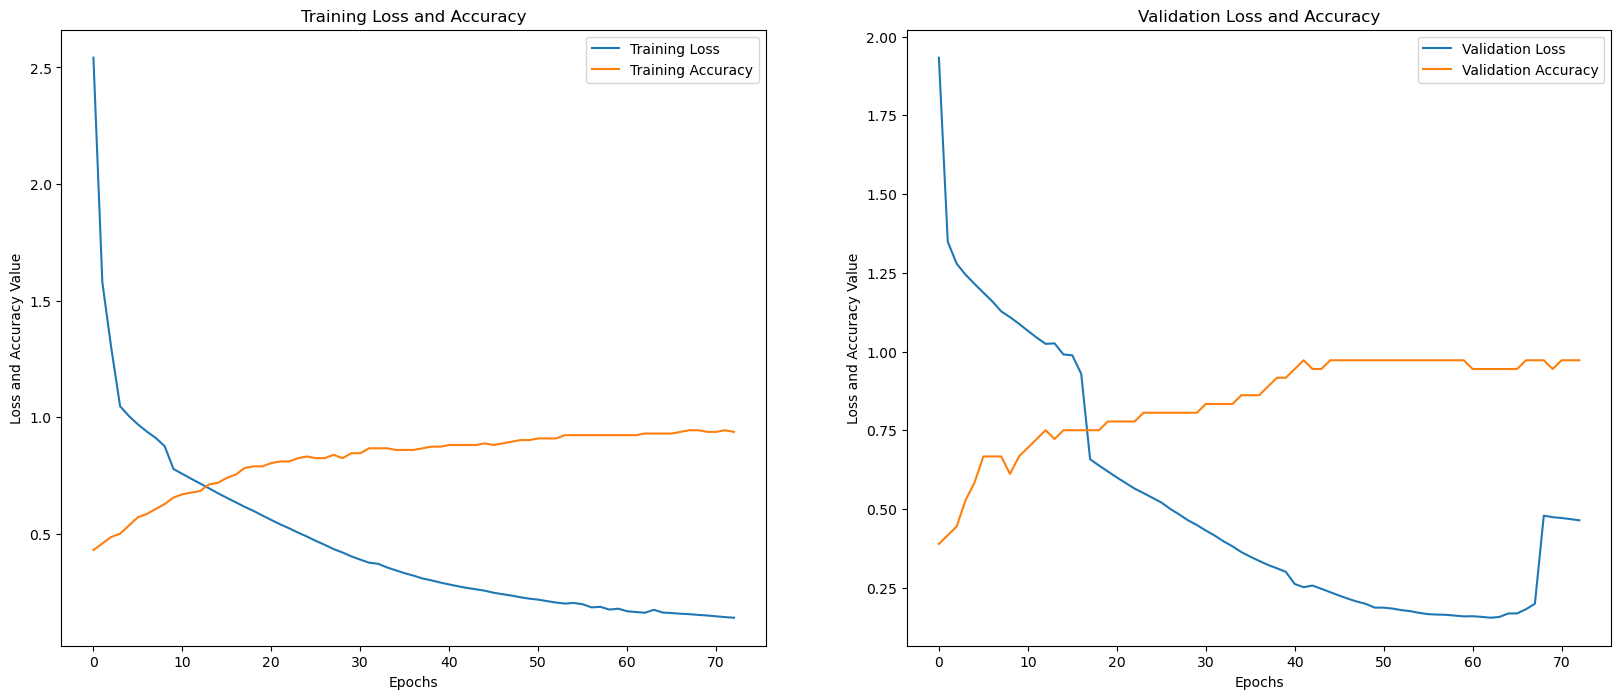

In [388]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Wykres dla danych trenowania
axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss and Accuracy Value')
axes[0].set_title('Training Loss and Accuracy')
axes[0].legend()

# Wykres dla danych walidacji
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss and Accuracy Value')
axes[1].set_title('Validation Loss and Accuracy')
axes[1].legend()

plt.show()

In [389]:
# Ocenianie modelu na danych testowych
test_loss, test_accuracy = model_2.evaluate(X_test, y_test, verbose=2)

2/2 - 0s - loss: 0.1545 - accuracy: 0.9444 - 32ms/epoch - 16ms/step


In [390]:
# prognozowanie klasy na próbkach testowych
y_pred_test_2 = model_2.predict(X_test)

2/2 [==============================] - 0s 3ms/step


In [391]:
# Znazienie przewidywnej klasy za pomocą argmax, wyniki są prawdopodobiństwami przynależności do klas
y_pred_labels_2 = np.argmax(y_pred_test_2, axis=1)

In [392]:
confusion_2 = confusion_matrix(y_test, y_pred_labels_2)

In [38]:
confusion = confusion_matrix(y_test, y_pred_labels)

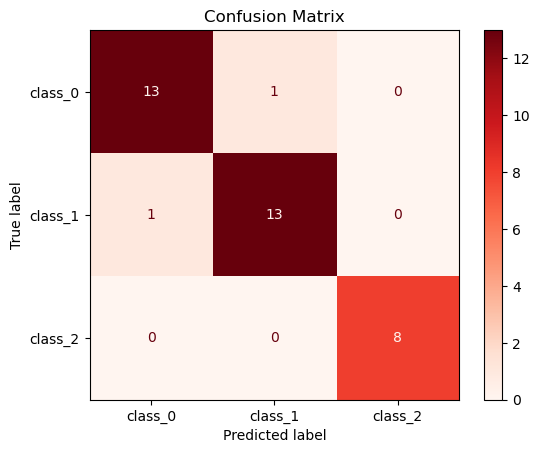

In [393]:
disp = ConfusionMatrixDisplay(confusion_2, display_labels=data.target_names)
disp.plot(cmap='Reds', values_format='d')

plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

In [41]:
report = classification_report(y_test, y_pred_labels , target_names=data.target_names)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      0.93      0.96        14
     class_2       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



In [394]:
report_2 = classification_report(y_test, y_pred_labels_2 , target_names=data.target_names)

print("Classification Report:")
print(report_2)

Classification Report:
              precision    recall  f1-score   support

     class_0       0.93      0.93      0.93        14
     class_1       0.93      0.93      0.93        14
     class_2       1.00      1.00      1.00         8

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.94      0.94      0.94        36



Obserwacje: Dodanie dodatkowej wartwy ukrytej może być formą regularyzacji, dla niewielkich zbiorów danych.

Zadanie 2. 25pkt Zapoznaj się z danymi: https://www.kaggle.com/datasets/weinoose/migraine-classification dotyczącymi klasyfikacji migreny (zmienna y= 'Type'). Dokonaj analizy zbioru oraz przekształć zmienną y na postać 0/1 według własnego podejścia. Korzystając z klasy poznanej na zajęciach ("modelANN_ext") stwórz model sieci neuronowej. Wytypuj najlepszą Twoim zdaniem funkcję aktywacji. Zoptymalizuj parametry modelu: na początku learning rate, a później liczbę neuronów w wartswie ukrytej.

In [4]:
df = pd.read_csv('data.csv')

In [5]:
df.head()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          400 non-null    int64 
 1   Duration     400 non-null    int64 
 2   Frequency    400 non-null    int64 
 3   Location     400 non-null    int64 
 4   Character    400 non-null    int64 
 5   Intensity    400 non-null    int64 
 6   Nausea       400 non-null    int64 
 7   Vomit        400 non-null    int64 
 8   Phonophobia  400 non-null    int64 
 9   Photophobia  400 non-null    int64 
 10  Visual       400 non-null    int64 
 11  Sensory      400 non-null    int64 
 12  Dysphasia    400 non-null    int64 
 13  Dysarthria   400 non-null    int64 
 14  Vertigo      400 non-null    int64 
 15  Tinnitus     400 non-null    int64 
 16  Hypoacusis   400 non-null    int64 
 17  Diplopia     400 non-null    int64 
 18  Defect       400 non-null    int64 
 19  Ataxia       400 non-null    

In [7]:
df.columns

Index(['Age', 'Duration', 'Frequency', 'Location', 'Character', 'Intensity',
       'Nausea', 'Vomit', 'Phonophobia', 'Photophobia', 'Visual', 'Sensory',
       'Dysphasia', 'Dysarthria', 'Vertigo', 'Tinnitus', 'Hypoacusis',
       'Diplopia', 'Defect', 'Ataxia', 'Conscience', 'Paresthesia', 'DPF',
       'Type'],
      dtype='object')

In [8]:
# Typy migren:
df['Type'].unique()

array(['Typical aura with migraine', 'Migraine without aura',
       'Basilar-type aura', 'Sporadic hemiplegic migraine',
       'Familial hemiplegic migraine', 'Other',
       'Typical aura without migraine'], dtype=object)

In [9]:
df['Type'].value_counts()

Typical aura with migraine       247
Migraine without aura             60
Familial hemiplegic migraine      24
Typical aura without migraine     20
Basilar-type aura                 18
Other                             17
Sporadic hemiplegic migraine      14
Name: Type, dtype: int64

In [10]:
df.isnull().sum()

Age            0
Duration       0
Frequency      0
Location       0
Character      0
Intensity      0
Nausea         0
Vomit          0
Phonophobia    0
Photophobia    0
Visual         0
Sensory        0
Dysphasia      0
Dysarthria     0
Vertigo        0
Tinnitus       0
Hypoacusis     0
Diplopia       0
Defect         0
Ataxia         0
Conscience     0
Paresthesia    0
DPF            0
Type           0
dtype: int64

In [11]:
# Wybranie typów migren z kolumny Type. Filtracja tylko tych wierszy, w których kolumna 'Type' zawiera wartości 'Typical aura with migraine' lub 'Migraine without aura'.
df_filtered = df[(df['Type'] == 'Typical aura with migraine') | (df['Type'] == 'Migraine without aura')]
df_filtered.head()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine


In [12]:
df_filtered['Type'].value_counts()

Typical aura with migraine    247
Migraine without aura          60
Name: Type, dtype: int64

In [13]:
df_encoded = pd.get_dummies(df_filtered, columns=['Type'], drop_first=True)
df_encoded

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type_Typical aura with migraine
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,1
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,1
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,35,3,2,1,1,3,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
315,18,2,2,1,1,3,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
316,28,3,3,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
317,26,2,1,1,1,3,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X = df_encoded.drop('Type_Typical aura with migraine', axis=1)
y = df_encoded['Type_Typical aura with migraine']

In [15]:
# Skalowanie cech 
standardscaler = StandardScaler()
X = standardscaler.fit_transform(X)
X

array([[-0.23698964, -0.77754099,  1.42990054, ..., -0.0571662 ,
         0.        , -0.71576202],
       [ 1.36379844,  1.88955491,  1.42990054, ..., -0.0571662 ,
         0.        , -0.71576202],
       [ 1.60391665,  0.55600696, -0.87748167, ..., -0.0571662 ,
         0.        , -0.71576202],
       ...,
       [-0.39706844,  1.88955491,  0.27620943, ..., -0.0571662 ,
         0.        , -0.71576202],
       [-0.55714725,  0.55600696, -0.87748167, ..., -0.0571662 ,
         0.        , -0.71576202],
       [-0.79726546,  0.55600696, -0.87748167, ..., -0.0571662 ,
         0.        , -0.71576202]])

In [16]:
# Podział danych na treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train

array([[-0.95734427, -0.77754099, -0.87748167, ..., -0.0571662 ,
         0.        , -0.71576202],
       [ 1.92407427, -0.77754099, -0.87748167, ..., -0.0571662 ,
         0.        , -0.71576202],
       [-1.43758069, -0.77754099, -0.87748167, ..., -0.0571662 ,
         0.        , -0.71576202],
       ...,
       [ 0.16320738, -0.77754099, -0.87748167, ..., -0.0571662 ,
         0.        ,  1.39711241],
       [ 0.16320738, -0.77754099, -0.87748167, ..., -0.0571662 ,
         0.        , -0.71576202],
       [ 0.80352262, -0.77754099,  0.85305499, ..., -0.0571662 ,
         0.        ,  1.39711241]])

In [18]:
X_train.shape

(245, 23)

In [19]:
X_test

array([[ 0.24324679, -0.77754099, -0.87748167, ..., -0.0571662 ,
         0.        , -0.71576202],
       [-1.27750189, -0.77754099,  1.42990054, ..., -0.0571662 ,
         0.        , -0.71576202],
       [ 1.12368023, -0.77754099,  0.27620943, ..., -0.0571662 ,
         0.        , -0.71576202],
       ...,
       [ 0.08316798, -0.77754099, -0.87748167, ..., -0.0571662 ,
         0.        , -0.71576202],
       [-0.31702904, -0.77754099, -0.87748167, ..., -0.0571662 ,
         0.        ,  1.39711241],
       [ 0.16320738,  1.88955491, -0.30063612, ..., -0.0571662 ,
         0.        , -0.71576202]])

In [46]:
# zbudowanie modelu jako klasy
class modelANN_ext(object):
    """
    Simple Neural Network
    """
    def __init__(self, hNum, hNum2, act_h, lr, random_state=None):
        """
        :param hNum: number of neurons in hidden layer
        :param lr: leraning rate
        """
        # Inicjalizacja losowego stanu (ziarno)
        if random_state is not None:
            np.random.seed(random_state)
        
        # inicjalizacja learnig rate'u
        self.lr = lr
        
        # ilość wejść
        self.inNum = 23
        # ilość wyjść
        self.outNum = 1
        
        #inicjalizacja wag
        #warstwa wejściowa to same wejścia, wszystko leci na ukrytą
        
        # warstwa ukryta, 
        self.W_h = tf.Variable(tf.random.normal([self.inNum,hNum]))
        self.b_h = tf.Variable(tf.random.normal([hNum]))
        
        # druga warstwa ukryta, 
        self.W_h2 = tf.Variable(tf.random.normal([hNum,hNum2]))
        self.b_h2 = tf.Variable(tf.random.normal([hNum2]))
        
        # warstwa wyjściowa,
        self.W_out = tf.Variable(tf.random.normal([hNum2,self.outNum]))
        self.b_out = tf.Variable(tf.random.normal([self.outNum]))

        # aktywacja w warstwach ukrytych
        self.act_h = act_h
        
    def predict(self, x):
        """
        :param x: input data, 2D - [batch, features], batch could be None, also could be one row of feature, but also 2D
        """
        # feed forward
        # wejściowa warstwa
        layer_in = tf.cast(x, tf.float32) 
        # warstwa ukryta
            # mnożymy przez wagi i dodajemy biasy
        layer_hidden = tf.add(tf.matmul(layer_in, self.W_h), self.b_h)
            # przechodzimy z sygnałem przez funkcję aktywacji
        if self.act_h == "relu":
            layer_hidden = tf.nn.relu(layer_hidden)
        else:
            layer_hidden = tf.nn.sigmoid(layer_hidden)
        # warstwa ukryta
            # mnożymy przez wagi i dodajemy biasy
        layer_hidden2 = tf.add(tf.matmul(layer_hidden, self.W_h2), self.b_h2)
            # przechodzimy z sygnałem przez funkcję aktywacji
        if self.act_h == "relu":
            layer_hidden2 = tf.nn.relu(layer_hidden2)
        else:
            layer_hidden2 = tf.nn.sigmoid(layer_hidden2)
        # warstwa wyjściowa
            # mnożymy przez wagi i dodajemy biasy
        layer_out = tf.add(tf.matmul(layer_hidden2, self.W_out), self.b_out)
            # przechodzimy z sygnałem przez funkcję aktywacji
            # sigmoid z tego względu, aby otrzymać znormalizowane wyjście w zakresie 0-1
        layer_out = tf.nn.sigmoid(layer_out)
        return layer_out

    def weightsUpdate(self, dW_h, db_h, dW_h2, db_h2, dW_out, db_out):
        """
        :param dW_h:  hidden layer weights derivative
        :param db_h:  hidden layer bias derivative
        :param dW_out:  out layer weights derivative
        :param db_out:  out layer bias derivative
        """
        # korekta wag warstwy ukrytej
        self.W_h.assign_sub(self.lr * dW_h)
        # korekta biasu warstwy ukrytej
        self.b_h.assign_sub(self.lr * db_h)
        # korekta wag warstwy ukrytej
        self.W_h2.assign_sub(self.lr * dW_h2)
        # korekta biasu warstwy ukrytej
        self.b_h2.assign_sub(self.lr * db_h2)
        # korekta wag warstwy wyjściowej
        self.W_out.assign_sub(self.lr * dW_out)
        # korekta biasu warstwy wyjściowej
        self.b_out.assign_sub(self.lr * db_out)
    
    def lossMSE(self, y_pred, y_true):
        """
        :param y_pred: predicted data, from model
        :param y_true: true output from model
        """
        # zmiana kztałtu referencji na potrzeby oblcizeń macierzowych
        y_true = tf.cast(tf.reshape(y_true, (-1, self.outNum)), tf.float32)
        y_pred = tf.cast(y_pred, tf.float32)
        return tf.reduce_mean(tf.square(y_pred - y_true))
    
    def fit(self, x, y_true):
        """
        :param x: trainin data
        :param y_true: connected to x, real output
        """
        # definicja taśmy
        with tf.GradientTape() as t:
            # wyznaczenie błędu
            # tutaj jest uruchomiony cały model i policzony błąd
            # więc pod taśmę wchodzi cały model wraz z funkcją błędu !!!!
            current_loss = self.lossMSE(self.predict(x), y_true)
        # odwijamy taśmę i otrzymujemy pochodne
        dW_h, db_h, dW_h2, db_h2, dW_out, db_out = t.gradient(current_loss, [self.W_h, self.b_h, self.W_h2, self.b_h2,self.W_out, self.b_out])
        # korygujemy wagi
        self.weightsUpdate(dW_h, db_h, dW_h2, db_h2, dW_out, db_out)
        # błąd zwracamy do świata zewnętrznego
        return current_loss

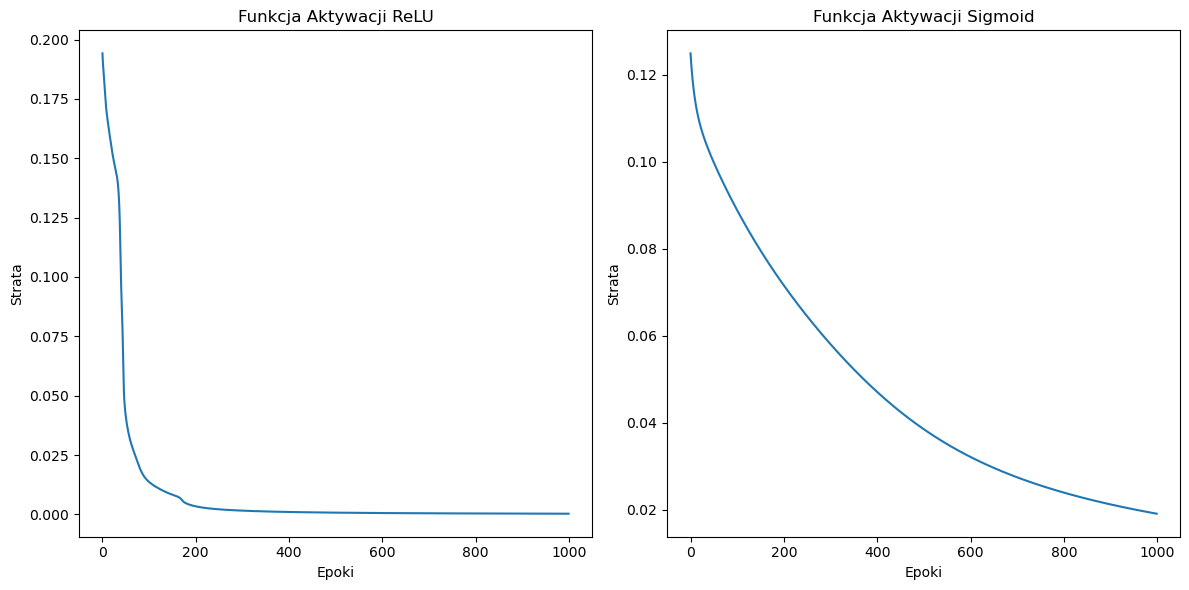

R^2 dla ReLU: 0.9023474028001207
R^2 dla Sigmoid: 0.7864382193025218


In [47]:
# Tworzenie modelu z różnymi funkcjami aktywacji
def create_and_train_model(activation_function):
    myModel_ext = modelANN_ext(10, 15, activation_function, 0.1, random_state=42)
    
    lossList = []
    epochsNum = 1000

    for i in range(epochsNum):
        tmpLoss = myModel_ext.fit(X_train, y_train).numpy()
        lossList.append(tmpLoss)

    return myModel_ext, lossList

# Funkcja aktywacji ReLU
myModel_relu, lossList_relu = create_and_train_model("relu")

# Funkcja aktywacji Sigmoid
myModel_sigmoid, lossList_sigmoid = create_and_train_model("sigmoid")

epochsNum = 1000

# Rysowanie wykresów porównawczych
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(np.arange(epochsNum), lossList_relu)
plt.title('Funkcja Aktywacji ReLU')
plt.xlabel('Epoki')
plt.ylabel('Strata')

plt.subplot(1, 2, 2)
plt.plot(np.arange(epochsNum), lossList_sigmoid)
plt.title('Funkcja Aktywacji Sigmoid')
plt.xlabel('Epoki')
plt.ylabel('Strata')

plt.tight_layout()
plt.show()

# Ocenianie modeli
y_pred_relu = myModel_relu.predict(X_test).numpy().reshape(-1)
r2_score_relu = r2_score(y_test, y_pred_relu)
print(f"R^2 dla ReLU: {r2_score_relu}")

y_pred_sigmoid = myModel_sigmoid.predict(X_test).numpy().reshape(-1)
r2_score_sigmoid = r2_score(y_test, y_pred_sigmoid)
print(f"R^2 dla Sigmoid: {r2_score_sigmoid}")

Funkcja aktywacji ReLu zastosowana w warstwach ukrytych lepiej sobie radzi z danymi niż funkcja aktywacji Sigmoid, co widać na wykresie funkcji straty jak i po wartości współczynnika determinacji R^2. Wybranie funkcji aktywacji ReLu, zamiast Sigmoid pomoga w ograniczeniu problemu zanikania gradientu. 

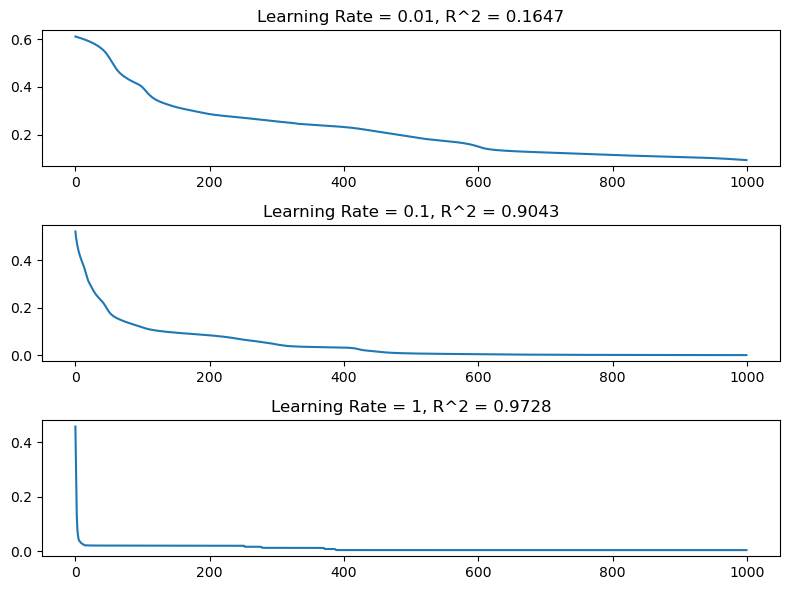

In [61]:
learning_rates = [0.01, 0.1, 1]
fig, axs = plt.subplots(len(learning_rates), figsize=(8, 6))

for learning_rate in learning_rates:
    myModel_ext = modelANN_ext(10, 15, 'relu', learning_rate, random_state=42)
    epochsNum = 1000
    lossList = []

    for epoch in range(epochsNum):
        tmpLoss = myModel_ext.fit(X_train, y_train)
        lossList.append(tmpLoss)

    y_pred = myModel_ext.predict(X_test).numpy().reshape(-1)
    r2 = r2_score(y_test, y_pred)

    i = learning_rates.index(learning_rate)
    ax = axs[i]
    ax.plot(lossList)
    ax.xlabel('Epoki')
    ax.ylabel('Strata')
    ax.set_title(f'Learning Rate = {learning_rate}, R^2 = {r2:.4f}')

plt.tight_layout()
plt.show()

Z powyższych wykresów widać, że wartość learnig rate 0.1 przy liczbie neurów w pierwszej warstwie 10 a w drugiej 15 jest najbardziej optymalny.

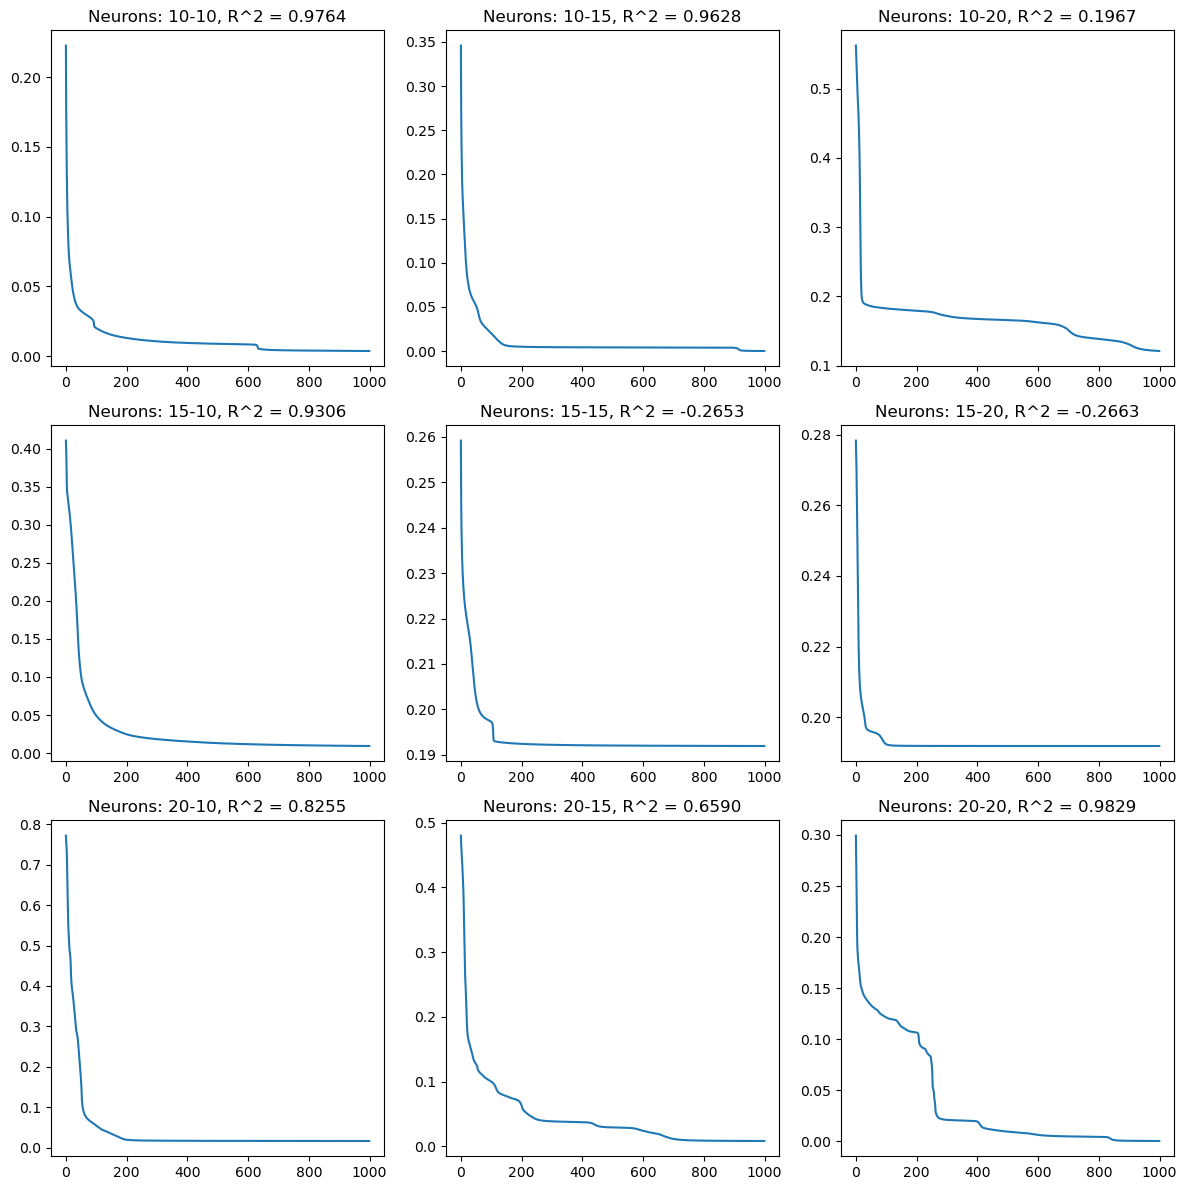

In [65]:
Nhums1 = [10, 15, 20]
Nhums2 = [10, 15, 20]

fig, axs = plt.subplots(len(Nhums1), len(Nhums2), figsize=(12, 12))

for i, num_hidden1 in enumerate(Nhums1):
    for j, num_hidden2 in enumerate(Nhums2):
        myModel_ext = modelANN_ext(num_hidden1, num_hidden2, 'relu', 0.1, random_state=42)
        epochsNum = 1000
        lossList = []

        for epoch in range(epochsNum):
            tmpLoss = myModel_ext.fit(X_train, y_train)
            lossList.append(tmpLoss)

        y_pred = myModel_ext.predict(X_test).numpy().reshape(-1)
        r2 = r2_score(y_test, y_pred)

        ax = axs[i, j]
        ax.plot(lossList)
        ax.set_title(f'Neurons: {num_hidden1}-{num_hidden2}, R^2 = {r2:.4f}')

plt.tight_layout()
plt.show()

W celu stworzenia modelu mniej skomplikowanego liczba neuronów będzie wynosiła 15 dla pierwszej warstwy(dwie warstwy w modelu), a dla drugiej 10 (przy wartości learning rate 0.1), wspóczynnik R^2 to 93%. Zmniejszanie liczby nuronów w kolejnych warstach, może być formą regularyzacji. Dla liczby neuronów 15-10, stabilny spadek funcji straty jest optymalny . 